<a href="https://colab.research.google.com/github/integrationtoinfinity/A_Naive_folk/blob/main/DLAI_Ontology.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

NECESSARY LIBRARIES

In [ ]:
pip install owlready2 networkx matplotlib


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.3/27.3 MB 66.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for owlready2: filename=owlready2-0.47-cp310-cp310-linux_x86_64.whl size=24075199 sha256=e035884aae4b21576533a9f4fbed8b73c559da8c1bd332d08b5a38590baafcbc
  Stored in directory: /root/.cache/pip/wheels/27/3e/ba/4171c4b10bba9fe1774fbf8fcf794de889e636ce64ad83a533
Successfully built owlready2


ONTOLOGY CODE

In [ ]:
from owlready2 import *
import networkx as nx
import matplotlib.pyplot as plt

# Create the ontology
onto = get_ontology("http://example.org/ecommerce_discount.owl")

with onto:
    # Define classes
    class Customer(Thing):
        pass

    class Product(Thing):
        pass

    # Define data properties for tracking views and purchases
    class has_view_count(Product >> int, FunctionalProperty):
        pass

    class has_discount(Product >> float, FunctionalProperty):
        pass

    class has_purchase_status(Product >> str, FunctionalProperty):
        pass

    # Define object properties for customer-product interaction
    class hasViewed(Customer >> Product):
        pass

    class hasPurchased(Customer >> Product):
        pass

    # Create instances for products
    product_list = []
    product_names = ["Product_" + str(i) for i in range(1, 11)]
    for name in product_names:
        product_list.append(Product(name))

    # Assign properties to products
    view_counts = [4, 2, 6, 1, 3, 7, 2, 5, 9, 1]
    purchase_status = [
        "purchased", "not purchased", "purchased", "not purchased",
        "not purchased", "purchased", "not purchased", "purchased",
        "purchased", "not purchased"
    ]

    # Assign view counts, purchase status, and calculate discounts
    for i, product in enumerate(product_list):
        product.has_view_count = view_counts[i]
        product.has_purchase_status = purchase_status[i]
        if view_counts[i] > 3:
            product.has_discount = 5 + (view_counts[i] % 5)  # Discount 5-10%
        else:
            product.has_discount = 0

# Save the ontology (optional)
onto.save(file="ecommerce_discount.owl", format="rdfxml")

# Print product information
print("Product information with view counts, discounts, and purchase status:\n")
for product in product_list:
    print(f"{product.name}: Viewed {product.has_view_count} times, "
          f"Discount: {product.has_discount}%, "
          f"Status: {product.has_purchase_status}")


Product information with view counts, discounts, and purchase status:

Product_1: Viewed 4 times, Discount: 9%, Status: purchased
Product_2: Viewed 2 times, Discount: 0%, Status: not purchased
Product_3: Viewed 6 times, Discount: 6%, Status: purchased
Product_4: Viewed 1 times, Discount: 0%, Status: not purchased
Product_5: Viewed 3 times, Discount: 0%, Status: not purchased
Product_6: Viewed 7 times, Discount: 7%, Status: purchased
Product_7: Viewed 2 times, Discount: 0%, Status: not purchased
Product_8: Viewed 5 times, Discount: 5%, Status: purchased
Product_9: Viewed 9 times, Discount: 9%, Status: purchased
Product_10: Viewed 1 times, Discount: 0%, Status: not purchased


VISUALIZATION CODE

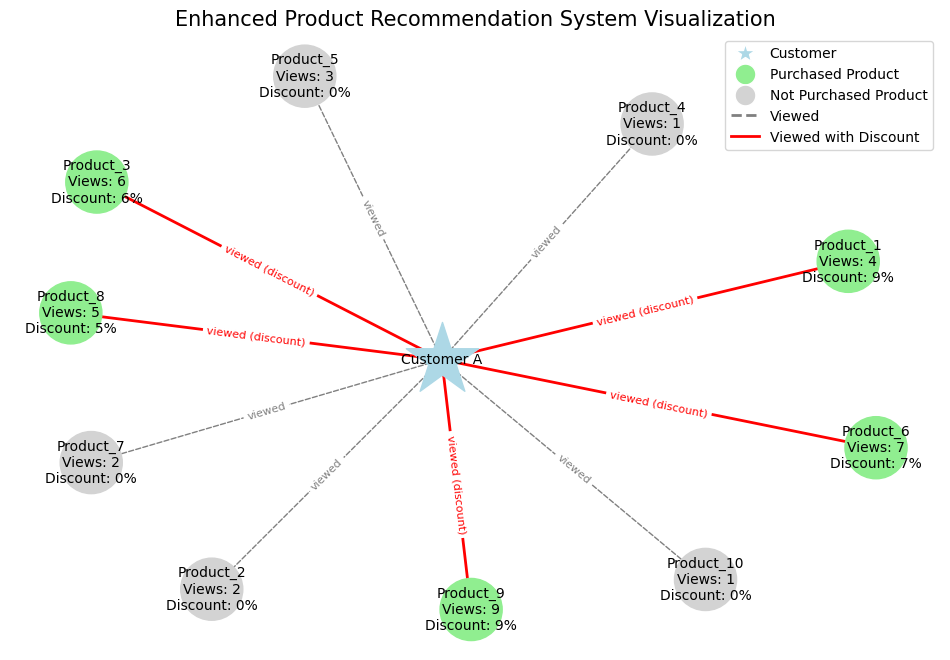

In [ ]:
# Create a directed graph
G = nx.DiGraph()

# Add a customer node
G.add_node("Customer_A", type="customer", label="Customer A", shape="star", color="lightblue")

# Add product nodes with attributes
for product in product_list:
    label = f"{product.name}\nViews: {product.has_view_count}\nDiscount: {product.has_discount}%"
    color = "lightgreen" if product.has_purchase_status == "purchased" else "lightgray"
    G.add_node(product.name, type="product", label=label, shape="o", color=color)

# Add edges with interactions and styles
for product in product_list:
    style = "solid" if product.has_purchase_status == "purchased" else "dashed"
    edge_color = "red" if product.has_discount > 0 else "gray"
    width = 2 if product.has_discount > 0 else 1
    label = "viewed (discount)" if product.has_discount > 0 else "viewed"

    G.add_edge("Customer_A", product.name, label=label, style=style, color=edge_color, width=width)

# Visualization layout
pos = nx.spring_layout(G, k=0.5, seed=42)

# Extract node attributes
node_colors = [G.nodes[node]['color'] for node in G.nodes()]
node_shapes = {"star": [], "o": []}
for node in G.nodes():
    shape = G.nodes[node]["shape"]
    node_shapes[shape].append(node)

# Plot the graph
plt.figure(figsize=(12, 8))

# Draw customer node
nx.draw_networkx_nodes(G, pos, nodelist=node_shapes["star"],
                       node_color="lightblue", node_shape="*", node_size=3000, label="Customer")

# Draw product nodes
nx.draw_networkx_nodes(G, pos, nodelist=node_shapes["o"],
                       node_color=node_colors[1:], node_shape="o", node_size=2000, label="Products")

# Draw edges with styles
for edge in G.edges(data=True):
    nx.draw_networkx_edges(G, pos, edgelist=[(edge[0], edge[1])],
                           style=edge[2]["style"], edge_color=edge[2]["color"], width=edge[2]["width"])
    nx.draw_networkx_edge_labels(G, pos, edge_labels={(edge[0], edge[1]): edge[2]["label"]},
                                 font_color=edge[2]["color"], font_size=8)

# Draw labels
labels = {node: G.nodes[node]["label"] for node in G.nodes()}
nx.draw_networkx_labels(G, pos, labels, font_size=10)

# Add a custom legend
from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], marker="*", color="w", label="Customer", markerfacecolor="lightblue", markersize=15),
    Line2D([0], [0], marker="o", color="w", label="Purchased Product", markerfacecolor="lightgreen", markersize=15),
    Line2D([0], [0], marker="o", color="w", label="Not Purchased Product", markerfacecolor="lightgray", markersize=15),
    Line2D([0], [0], color="gray", lw=2, linestyle="dashed", label="Viewed"),
    Line2D([0], [0], color="red", lw=2, label="Viewed with Discount")
]
plt.legend(handles=legend_elements, loc="upper right")

plt.title("Enhanced Product Recommendation System Visualization", size=15)
plt.axis("off")
plt.show()
